# Performing a Hello world example on 2-Qubit Bell State

# step 1: Map the problems and circuit operators

Some Basic Questions: 

1. What is a Quantum Circuit?  
Ans: Think of QC as a set of instructions that tells a Quantum computer to what to do with the qubits, just like a electric circuit controls the flow of electricity, a quantum circuit controls the behavior of qubits. 


2. What is a hadmard gate ? <br>
A H-Gate is responsible for creating Superposition in a qubit. (The coin example) <br>
the second question I would ask is.. why would we use a Hadmard gate? what if I don't use one? 

- A H-gate has some perks here: 
1. It creates superposition , a crucial thing to explore many computational paths simulatenously <br>
2. Prepares states for algorithm , most QML algorithms starts by applying H-Gate to prepare an equal superposition of all possible inputs, like previously discussed, in Grover's algorithm or the Quantum Fourier Transform.



Question: What if we don't use one ? <br>

- Without the Hadamard gate (or some other method of creating superposition), your qubits stay in their initial basis states (usually ∣0⟩)  <br>
- This means no superposition, so the quantum computer effectively behaves like a classical deterministic system, losing the quantum advantage. <br>
- You won’t be able to exploit parallelism inherent to quantum computing.



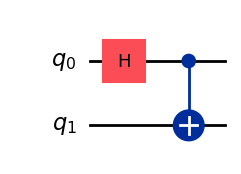

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2) # this create a quantum circuit with two qubits
qc.h(0)  # this applies a Hadmard gate to qubit 0 
qc.cx(0,1) # this applies a CNOT ( Controlled NOT) gate with , Control qubit = 0 and Target qubit = 1
qc.draw(output = 'mpl')

What is a Pauli Operator? 

- Pauli operators are basic quantum operators (matrices) that act on single qubit , there are total 4 pauli 
operators.

    1. identity: does nothing ( identity matrix )
    2. Pauli-X : Bit Flip
    3. Pauli-Y : Bit and Phase Flip
    4. Pauli-Z : Phase Flip

In [ ]:
from qiskit.quantum_info import Pauli
ZZ = Pauli('ZZ')   
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

# List of Pauli observables
observables = [ZZ,ZI,IZ,XX,XI,IX]



## Step 2: Optimize

# Step3: Execute on the backend

In [6]:
from qiskit_aer.primitives import Estimator


estimator = Estimator() # Estimator: It’s a tool to calculate expectation values ⟨ψ|O|ψ⟩
                        # Where:
                            # ψ⟩ is the final quantum state produced by a circuit
                            # O is an observable (like a Pauli operator: Z, X, etc)

job = estimator.run([qc] * len(observables), observables)
job.result()

EstimatorResult(values=array([ 1.        ,  0.01953125,  0.01953125,  1.        , -0.00390625,
       -0.00390625]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0122044, 'sample_measure_time': 0.0017546, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 15809, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9996185302734375, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0122044, 'sample_measure_time': 0.00175

# Step 4: Post-process (and plotting)

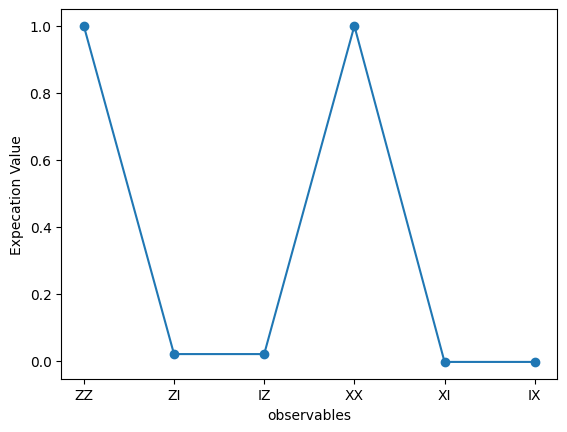

In [7]:
import matplotlib.pyplot as plt


data =  ['ZZ','ZI','IZ','XX','XI','IX']
values = job.result().values
plt.plot(data,values,'-o')
plt.xlabel('observables')
plt.ylabel('Expecation Value')
plt.show()

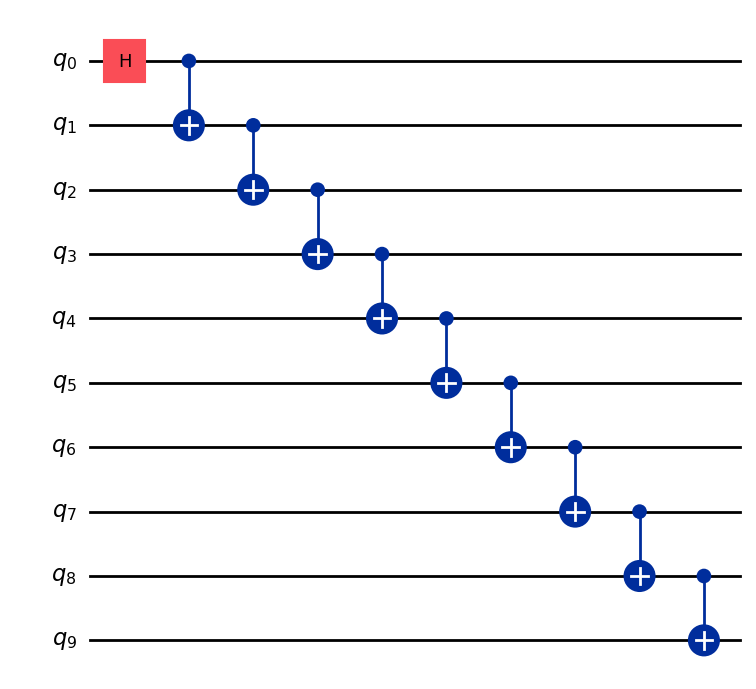

In [9]:
def get_qc_for_n_qubit_GHZ_states(n): 
    qc = QuantumCircuit(n)
    qc.h(0) #Hadmard Gate at 0 
    for i in range(n-1): 
        qc.cx(i,i+1)

    return qc
n = 10
qc = get_qc_for_n_qubit_GHZ_states(n)
qc.draw('mpl')

-quantum_info Module: deals with operators, states and quantum information tasks. <br>
SparsePauliOp: A class that represents quantum operators using Pauli strings (combinations of I, X, Y, Z), especially useful for defining Hamiltonians efficiently.


In [12]:
from qiskit.quantum_info import SparsePauliOp
operator_strings = ['Z' + 'I'*i + 'Z' + 'I'*(n-i-2) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))
operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]

['ZZIIIIIIII', 'ZIZIIIIIII', 'ZIIZIIIIII', 'ZIIIZIIIII', 'ZIIIIZIIII', 'ZIIIIIZIII', 'ZIIIIIIZII', 'ZIIIIIIIZI', 'ZIIIIIIIIZ']
9
